In [2]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Read in Datasets

In [3]:
# get "working_data.pkl" from drive
share_link = 'https://drive.google.com/file/d/1-dXLFHTFpFQi6agd_UqkKl76BFgx5HdP/view?usp=sharing'
loc = 'https://drive.google.com/uc?export=download&id=' + share_link.split('/')[-2]
print(loc)
working_df = pd.read_csv(loc).fillna("")

# get "debug_data.pkl" from drive
share_link = 'https://drive.google.com/file/d/1-fDWeNN8UG3eZtQiwjPRxED7AoomPeeG/view?usp=sharing'
loc = 'https://drive.google.com/uc?export=download&id=' + share_link.split('/')[-2]
print(loc)
debug_df = pd.read_csv(loc).fillna("")

https://drive.google.com/uc?export=download&id=1-dXLFHTFpFQi6agd_UqkKl76BFgx5HdP
https://drive.google.com/uc?export=download&id=1-fDWeNN8UG3eZtQiwjPRxED7AoomPeeG


# Visualize GPA distribution for each column individually

From these graphs, we see that some features like year and term don't vary much with GPA. However, many other features have some values associated with a very small range of GPAs and other values that see the whole range of GPAs.



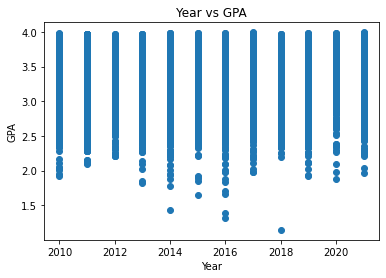

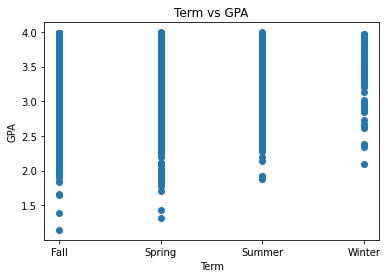

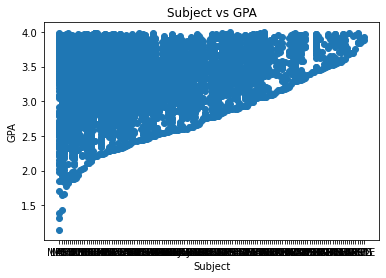

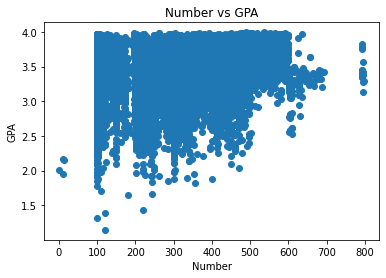

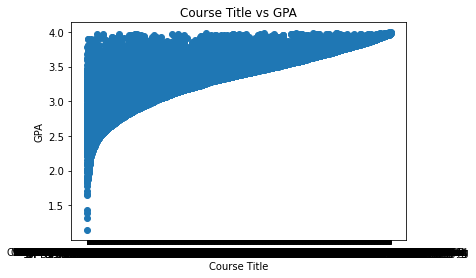

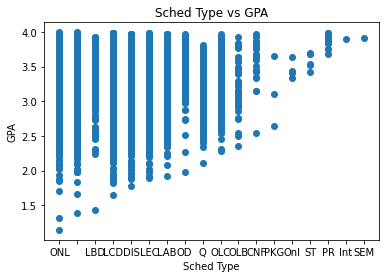

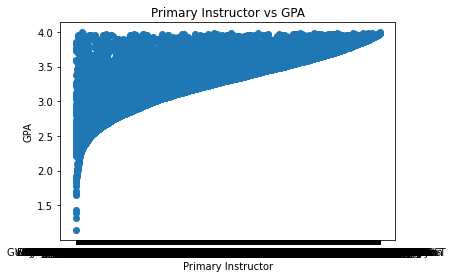

In [ ]:
features = list(working_df.drop(columns="GPA").columns)
temp = working_df.sort_values("GPA")

for f in features:
    plt.title(f + " vs GPA")
    plt.xlabel(f)
    plt.ylabel("GPA")
    plt.scatter(temp[f], temp['GPA'])
    plt.show()

# Descriptive Statistics for each numerical column
The course number and years are pretty evenly distributed, but the GPA skews heavily to higher values.

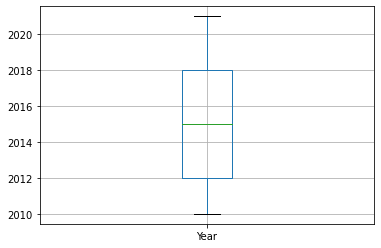

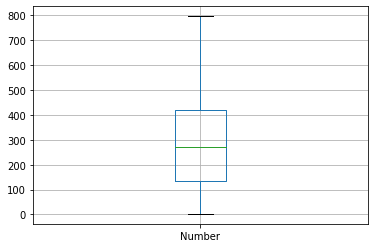

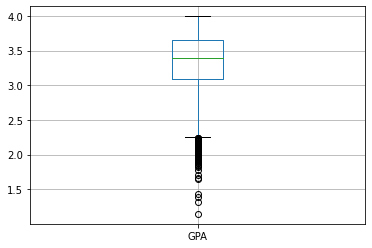

In [ ]:
for c in ['Year', 'Number', 'GPA']:
  boxplot = working_df.boxplot(column=c)
  plt.show()

# Data distribution histogram for categorical data
Interestingly, a lot of the categorical data has the same shape of a long tail off to the right

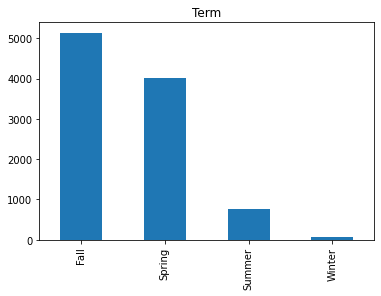

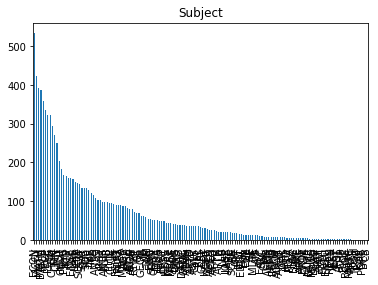

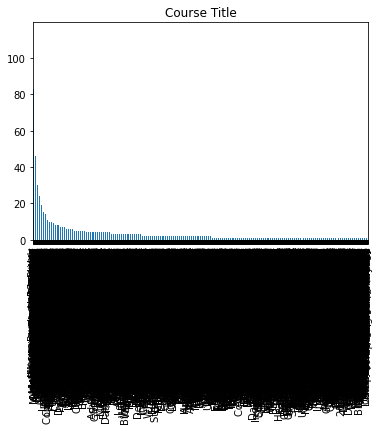

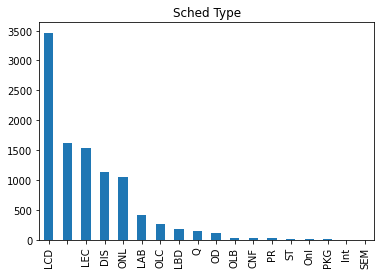

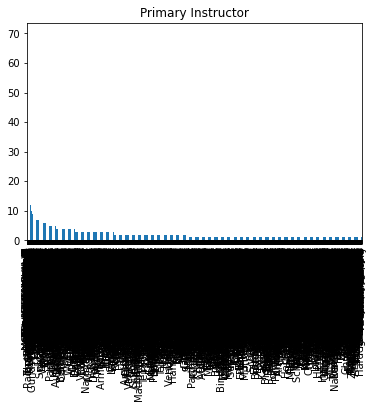

In [ ]:
temp = working_df.drop(columns=['Year', 'Number', 'GPA'])

for c in temp.columns:
  data = temp[c].value_counts().plot(kind='bar', title=c)
  plt.show()

# Do Regression
A simple linear regression has 15.2% error


In [ ]:
# Encode categorical data by assigning each unique value a number
enc = OrdinalEncoder()
encoded = working_df.copy()
encoded[['Term', 'Subject', 'Course Title', 'Sched Type', 'Primary Instructor']] = enc.fit_transform(working_df[['Term', 'Subject', 'Course Title', 'Sched Type', 'Primary Instructor']])


In [ ]:
X = encoded.drop(columns='GPA')
y = encoded[['GPA']]
encoded.head(5)

,Year,Term,Subject,Number,Course Title,Sched Type,Primary Instructor,GPA
0,2015,0.0,90.0,101,1052.0,2.0,1663.0,2.875417
1,2011,2.0,99.0,124,994.0,6.0,166.0,2.904286
2,2016,0.0,99.0,417,1421.0,0.0,3923.0,3.284074
3,2017,1.0,2.0,302,664.0,0.0,1116.0,3.381765
4,2020,1.0,50.0,120,1537.0,7.0,26.0,3.595000


In [ ]:
clf = LinearRegression().fit(X, y)
y["Preds"] = clf.predict(X)
mean_squared_error(y['GPA'], y["Preds"])

0.15232813440437468